<a href="https://colab.research.google.com/github/Rizki-132/Allmateri/blob/main/Klasifikasi_program_pkh_(Fix).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Library Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

#Library C4.5
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#K-fold Cross Validation
from sklearn.model_selection import KFold, cross_val_score

warnings.filterwarnings('ignore')

Import Data

Jobs
1 = Buruh
2 = Petani
3 = Guru
4 = ibu rumah tangga
5 = pedagang
6 = sopir
7 = PNS
8 = Pengangguran
9 = Dokter
10 = Satpam

gender
1 = Laki - laki
2 = Perempuan

Status
1 = Belum Menikah
2 = Sudah Menikah
3 = Janda
4 = Duda


In [29]:
df = pd.read_csv('/content/pkh_data_pkh_versi(fix).csv')
df

,nama,umur,tempat lahir,jenis pekerjaan,jumlah penghasilan,jenis kelamin,jumlah keluarga (SD),jumlah keluarga (SMP),jumlah keluarga (SMA),status perkawinan,penerima PKH
0,JUMHADI,55,Majalengka,4,5706374,2,1,2,1,4,0
1,SITI,28,Majalengka,3,3583863,2,0,1,1,3,0
2,LASTRA,32,Majalengka,6,3828790,2,1,3,1,1,0
3,ISWADI,48,Majalengka,2,5177570,2,1,0,3,2,0
4,ROJI,20,Majalengka,8,2274916,1,0,3,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...
320,RUSMINI,22,Majalengka,3,596251,2,0,3,2,2,1
321,WARNITA,28,Majalengka,6,4900686,1,0,3,3,4,0
322,HANAN,36,Majalengka,6,6824162,1,0,2,1,1,0
323,NOAH,50,Majalengka,10,227685,2,2,3,0,1,1


#Data Understanding

In [30]:
print("data shape", df.shape)

data shape (325, 11)


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   nama                   325 non-null    object
 1   umur                   325 non-null    int64 
 2   tempat lahir           325 non-null    object
 3   jenis pekerjaan        325 non-null    int64 
 4   jumlah penghasilan     325 non-null    int64 
 5   jenis kelamin          325 non-null    int64 
 6   jumlah keluarga (SD)   325 non-null    int64 
 7   jumlah keluarga (SMP)  325 non-null    int64 
 8   jumlah keluarga (SMA)  325 non-null    int64 
 9   status perkawinan      325 non-null    int64 
 10  penerima PKH           325 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 28.1+ KB


In [32]:
df.describe()

,umur,jenis pekerjaan,jumlah penghasilan,jenis kelamin,jumlah keluarga (SD),jumlah keluarga (SMP),jumlah keluarga (SMA),status perkawinan,penerima PKH
count,325.000000,325.000000,3.250000e+02,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,40.470769,5.566154,3.539812e+06,1.550769,1.446154,1.476923,1.489231,2.415385,0.092308
std,13.905875,2.952206,1.955481e+06,0.498183,1.111538,1.158805,1.058785,1.131648,0.289906
min,18.000000,1.000000,5.142000e+03,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,3.000000,1.984927e+06,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,39.000000,6.000000,3.583863e+06,2.000000,1.000000,1.000000,1.000000,2.000000,0.000000
75%,53.000000,8.000000,5.177570e+06,2.000000,2.000000,3.000000,2.000000,3.000000,0.000000
max,65.000000,10.000000,6.979209e+06,2.000000,3.000000,3.000000,3.000000,4.000000,1.000000


In [33]:
df['penerima PKH'].value_counts()

penerima PKH
0    295
1     30
Name: count, dtype: int64

#Cleaning Data

In [34]:
df.isnull().sum()

nama                     0
umur                     0
tempat lahir             0
jenis pekerjaan          0
jumlah penghasilan       0
jenis kelamin            0
jumlah keluarga (SD)     0
jumlah keluarga (SMP)    0
jumlah keluarga (SMA)    0
status perkawinan        0
penerima PKH             0
dtype: int64

In [35]:
#mencari duplikasi
df.duplicated().sum()

0

#Exploratory Data Analysisi(EDA)

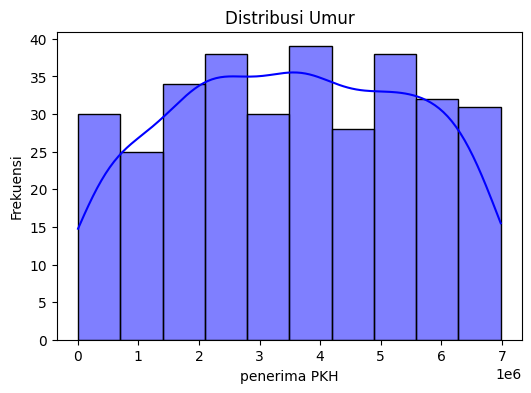

In [36]:
# @title umur vs jumlah penghasilan
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='jumlah penghasilan', bins=10, kde=True, color='blue')
plt.title('Distribusi Umur')
plt.xlabel('penerima PKH')
plt.ylabel('Frekuensi')
plt.show()

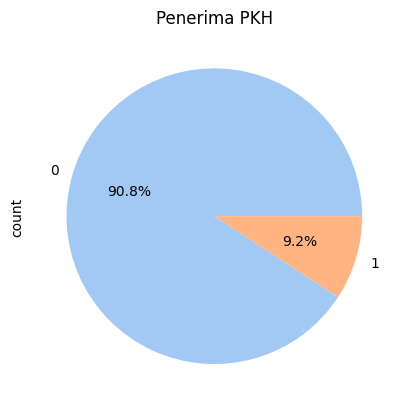

In [37]:
sns.set_palette('pastel')
df['penerima PKH'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Penerima PKH')
plt.show()

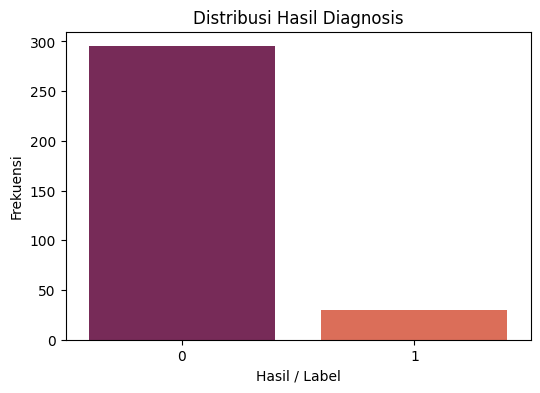

In [38]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='penerima PKH', palette='rocket')

plt.title('Distribusi Hasil Diagnosis')
plt.xlabel('Hasil / Label')
plt.ylabel('Frekuensi')
plt.show()

In [39]:
df = df.drop(columns=['nama','tempat lahir'])
df.corr()

,umur,jenis pekerjaan,jumlah penghasilan,jenis kelamin,jumlah keluarga (SD),jumlah keluarga (SMP),jumlah keluarga (SMA),status perkawinan,penerima PKH
umur,1.000000,-0.071770,-0.008148,-0.001901,0.013925,0.029502,-0.161802,0.017739,-0.049858
jenis pekerjaan,-0.071770,1.000000,-0.026356,0.076930,-0.010433,0.019168,-0.046427,-0.004093,-0.014369
jumlah penghasilan,-0.008148,-0.026356,1.000000,0.039401,-0.063548,-0.041901,0.034923,0.037524,-0.492131
jenis kelamin,-0.001901,0.076930,0.039401,1.000000,0.050935,-0.055437,0.101976,0.030911,-0.011178
jumlah keluarga (SD),0.013925,-0.010433,-0.063548,0.050935,1.000000,-0.050688,-0.041799,-0.049640,0.005894
jumlah keluarga (SMP),0.029502,0.019168,-0.041901,-0.055437,-0.050688,1.000000,-0.037308,-0.043270,0.089046
jumlah keluarga (SMA),-0.161802,-0.046427,0.034923,0.101976,-0.041799,-0.037308,1.000000,-0.103157,-0.077193
status perkawinan,0.017739,-0.004093,0.037524,0.030911,-0.049640,-0.043270,-0.103157,1.000000,-0.023158
penerima PKH,-0.049858,-0.014369,-0.492131,-0.011178,0.005894,0.089046,-0.077193,-0.023158,1.000000


<Axes: >

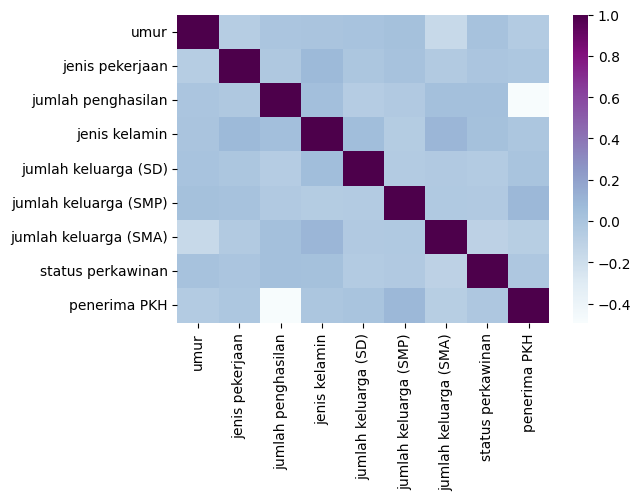

In [40]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), cmap='BuPu')

#Preparation Data

In [41]:
x = df.drop(columns=['penerima PKH'])
y = df['penerima PKH']

print("X : ", x.shape)
print("y : ", y.shape)

X :  (325, 8)
y :  (325,)


In [42]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Modeling dan Evaluasi

In [44]:
#Model Support Vector Machine
clf = SVC(kernel='linear')
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
CLF_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print("Akurasi model SVM : {:.2f}%".format(CLF_acc*100))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        56
           1       1.00      0.33      0.50         9

    accuracy                           0.91        65
   macro avg       0.95      0.67      0.72        65
weighted avg       0.92      0.91      0.89        65

Akurasi model SVM : 90.77%


#Testing

Jobs
1 = Buruh
2 = Petani
3 = Guru
4 = ibu rumah tangga
5 = pedagang
6 = sopir
7 = PNS
8 = Pengangguran
9 = Dokter
10 = Satpam

gender
1 = Laki - laki
2 = Perempuan

Status
1 = Belum Menikah
2 = Sudah Menikah
3 = Janda
4 = Duda


In [45]:
new_data = {
            'nama' : ['Saripah','Santi'],
            'umur' : [59, 29],
            'tempat lahir' : ['Majalengka', 'Majalengka'],
            'jenis pekerjaan' : [7, 10],
            'jumlah penghasilan' : [50000, 1000000],
            'jenis kelamin' : [2, 2],
            'jumlah keluarga (SD)' : [0, 0],
            'jumlah keluarga (SMP)' : [0, 0],
            'jumlah keluarga (SMA)' : [0, 0],
            'status perkawinan' : [3, 1]
             }
new_data = pd.DataFrame(new_data)
new_data

,nama,umur,tempat lahir,jenis pekerjaan,jumlah penghasilan,jenis kelamin,jumlah keluarga (SD),jumlah keluarga (SMP),jumlah keluarga (SMA),status perkawinan
0,Saripah,59,Majalengka,7,50000,2,0,0,0,3
1,Santi,29,Majalengka,10,1000000,2,0,0,0,1


In [46]:
# Asumsikan clf_svm adalah model SVM yang sudah dilatih
# Misalnya: clf_svm.fit(X_train_scaled, y_train)

# Prediksi menggunakan data numerik yang sudah di-scale
data_baru= new_data.drop(columns=['nama','tempat lahir'])

scaled_new_data = scaler.transform(data_baru)
y_pred_new = clf.predict(scaled_new_data)

print("Prediksi:", y_pred_new)

Prediksi: [1 1]


##Model Naive Bayes

In [47]:
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_nb = accuracy_score(y_test, y_pred)
print("Akurasi model Naive Bayes : {:.2f}%".format(accuracy_nb*100))

Akurasi model Naive Bayes : 95.38%


#Model C4.5

In [48]:
model_c45 = DecisionTreeClassifier(criterion='entropy', random_state=42)
model_c45.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [49]:
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy * 100:.2f}%")


Akurasi Model: 90.77%


#K-Fold Cross Validation

In [50]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
results = cross_val_score(clf, x, y, cv=kf, scoring='accuracy')

print(f"Akurasi rata-rata: {results.mean() * 100:.2f}%")
print(f"Standar deviasi akurasi: {results.std() * 100:.2f}%")

Akurasi rata-rata: 92.30%
Standar deviasi akurasi: 4.45%
